En una clínica infantil se ha ido anotando, durante un mes, el número de
metros que cada niño anda, seguido y sin caerse, el primer día que comienza
a caminar, obteniéndose la tabla de información adjunta:
Metros 1 2 3 4 5 6 7 8
Niños 2 6 10 5 10 3 2 2

Se pide:
a) Tabla de Frecuencia. Diagrama de Barras para las frecuencias absolutas,
relativas y acumuladas.
b) Mediana, media aritmética, moda y cuartiles.
c) Varianza y desviación Estándar.
d) ¿Entre qué dos valores se encuentra, como mínimo, el 75% de las
observaciones?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

#como son pocos datos creemoslos de manera manual

datos = {
    'metros':[1,2,3,4,5,6,7,8],
    'ninos':[2,6,10,5,10,3,2,2]
}

#creamos el dataframe
ninos_df = pd.DataFrame(datos)
varianza = ninos_df.var()['ninos']
#tabla inicial
ninos_df

,metros,ninos
0,1,2
1,2,6
2,3,10
3,4,5
4,5,10
5,6,3
6,7,2
7,8,2


In [2]:

ninos_df['fa'] = ninos_df['ninos'].cumsum()
total_ninos = ninos_df['ninos'].sum()
ninos_df['MxN'] = ninos_df['metros'] * ninos_df['ninos']
ninos_df['hi'] = ninos_df.apply(lambda row: row['ninos'] / total_ninos, axis=1)
ninos_df['hi_por'] = ninos_df.apply(lambda row: row['hi'] * 100, axis=1)
ninos_df['Ha'] = ninos_df['hi'].cumsum()
ninos_df['Ha_por'] = ninos_df.apply(lambda row: row['Ha'] * 100, axis=1)
ninos_df

,metros,ninos,fa,MxN,hi,hi_por,Ha,Ha_por
0,1,2,2,2,0.050,5.0,0.050,5.0
1,2,6,8,12,0.150,15.0,0.200,20.0
2,3,10,18,30,0.250,25.0,0.450,45.0
3,4,5,23,20,0.125,12.5,0.575,57.5
4,5,10,33,50,0.250,25.0,0.825,82.5
5,6,3,36,18,0.075,7.5,0.900,90.0
6,7,2,38,14,0.050,5.0,0.950,95.0
7,8,2,40,16,0.050,5.0,1.000,100.0


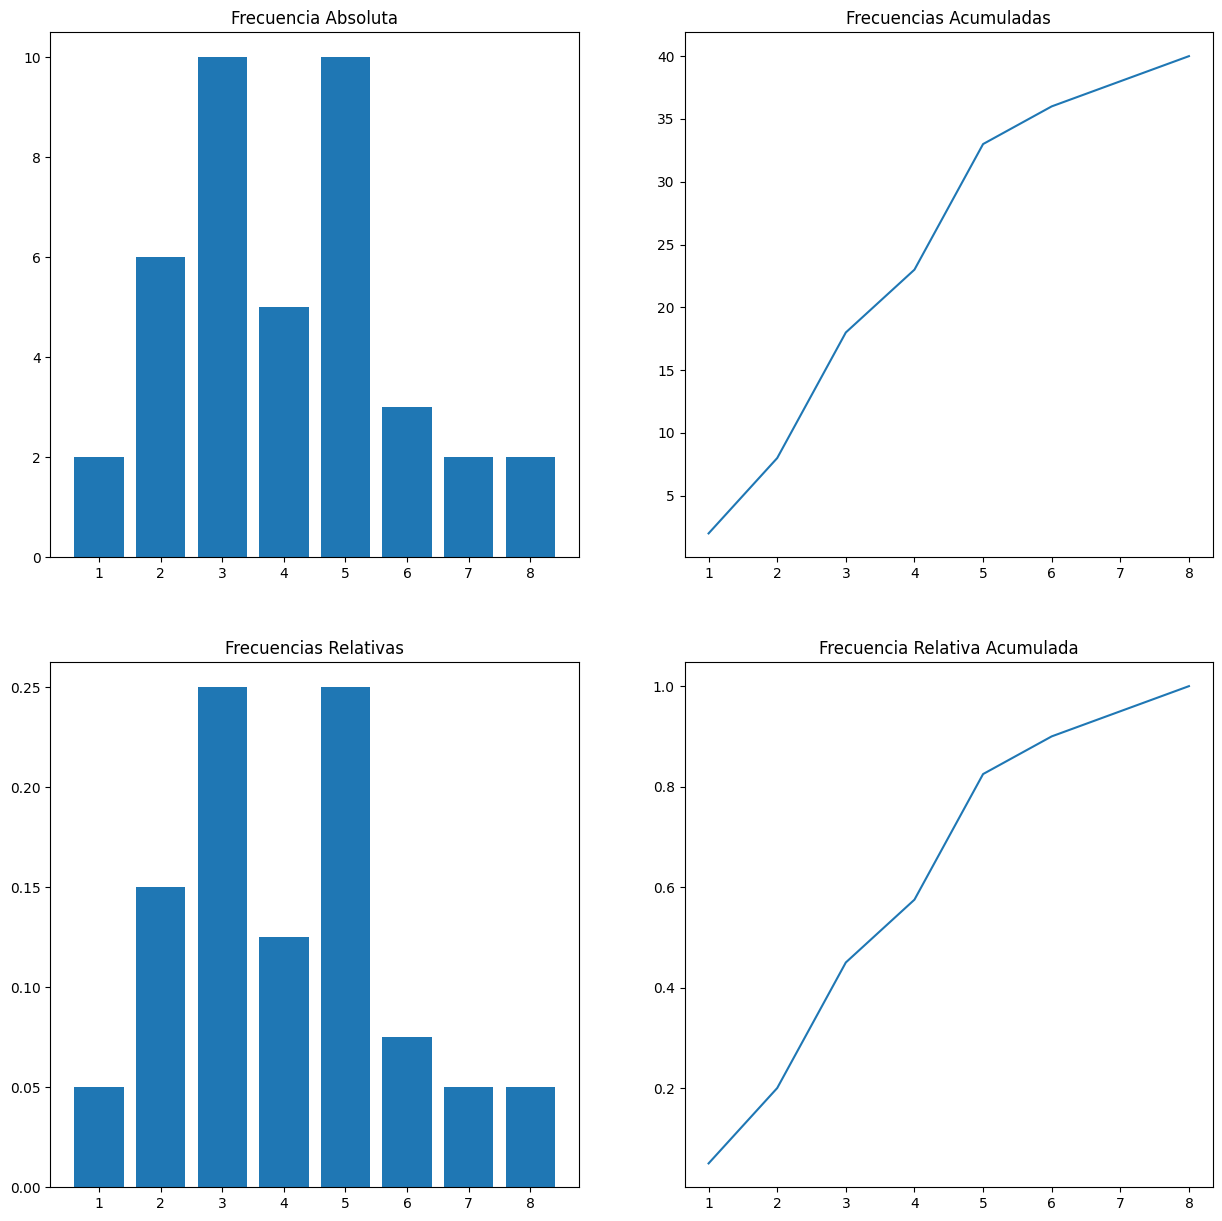

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15)) #creamos una especie de matriz para meter las graficas y les damos mas tamaño
axs[0, 0].bar(ninos_df['metros'], ninos_df['ninos']) 
axs[0, 0].set_title('Frecuencia Absoluta')
axs[0, 1].plot(ninos_df['metros'], ninos_df['fa'])
axs[0, 1].set_title('Frecuencias Acumuladas')
axs[1, 0].bar(ninos_df['metros'], ninos_df['hi'])
axs[1, 0].set_title('Frecuencias Relativas')
axs[1, 1].plot(ninos_df['metros'], ninos_df['Ha'])
axs[1, 1].set_title('Frecuencia Relativa Acumulada')


plt.show()

In [4]:
mediana = ninos_df.median()
sumados = ninos_df.sum()
media = sumados['MxN'] / total_ninos
ordenados = ninos_df.sort_values('ninos', ascending=False)
descripcion = ninos_df.std()
quantile = ninos_df.quantile([.25, .4, .6], interpolation='nearest')
desviacion = math.sqrt(varianza)
print(f'Mediana: {mediana["ninos"]}, Media Aritmetica: {media}, Moda: {ordenados.loc[2, "metros"]}')
print(f'Cuartiles:\n25% -> {quantile.loc[0.25, "metros"]},\n50% -> {quantile.loc[0.4, "metros"]},\n75% -> {quantile.loc[0.6, "metros"]}')
print(f'Varianza: {varianza}, Desviacion Estandar: {math.sqrt(varianza)}')


Mediana: 4.0, Media Aritmetica: 4.05, Moda: 3
Cuartiles:
25% -> 3,
50% -> 4,
75% -> 5
Varianza: 11.714285714285714, Desviacion Estandar: 3.4226138716316967


In [5]:
mean = ninos_df['ninos'].std()
k = 2 # numero de desviaciones standard
bajo = mean - k * desviacion
alto = mean + k * desviacion
print(bajo, alto)
dentro_limites = ninos_df.loc[(ninos_df['ninos'] >= bajo) & (ninos_df['ninos'] <= alto)]
proporcion_en_limite = len(dentro_limites) / len(ninos_df)

print(f"Proporcion de valores {k} desviaciones estandar de la media: {proporcion_en_limite}")

-3.4226138716316967 10.26784161489509
Proporcion de valores 2 desviaciones estandar de la media: 1.0


In [6]:
mean = sum(ninos_df['ninos']) / len(ninos_df['ninos'])
squared_diff = [(x - mean) ** 2 for x in ninos_df['ninos']]
variance = sum(squared_diff) / len(ninos_df['ninos'])
std_deviation = variance ** 0.5

print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Variance: 10.25
Standard Deviation: 3.2015621187164243
